In [1]:
import pandas as pd
import PyPDF2
import numpy as np
import math
from extractors.abstract_extractor import AbstractExractor
from utils.data.visualisation import visualiseIndividualfromDF, visualiseIndividualinMPL
from utils.extract_utils.extract_utils import rotate_origin_only, move_along_the_axis, scale_values_based_on_eich_peak, \
    create_measurement_points, adjust_leads_baseline, preprocess_page_content, extract_graphics_string
from utils.misc.datastructure import perform_shape_switch
from tools.extraction_tools import extract_PDF_raw, extract_leads_numeric, move_trace_to_origin
import logging
from tqdm import tqdm
import os
import matplotlib.pyplot as plt

<font color='green'>**Import leads from PDF EKG as numeric values**</font>


In [2]:
# reference value for the calibration jag
cal_ref = 1000

# extracted height for the calibration jag in PDF (extract pixel height from PDF)
#orginal provided measurement from codebase 28.34800000000001 (height that is read in via pdf reader)
#extracted by measuring pixel height in Illustrator (28.35)
cal_height = 1000 #height that is read in with pdf reader with our EKG pdfs


# factor for scaling (effectively gamma = 1 based on read in structure from GE EKGs)
gamma = cal_ref / cal_height

# name of the leads
lead_names_short = ['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']
lead_names_long = ['V1','II',"V5"]

#source data
path_source = os.getcwd()
data_source = 'data_test\\EKG_131515-20_0.pdf'
#data_source = 'data_test\\EKG_131515-33_0.pdf'
filename = os.path.join(path_source, data_source)

#Extract raw PDF data from source file
pdf_object = extract_PDF_raw(filename)


#define dict with index ranges for graphics object corresponding to leads/cal marker
range_list = {
    #range of lead extraction (short leads)
    'start_idx': 412,
    'end_idx'  : 423,
    #range of lead extraction (long leads)
    'start_idx_long': 427,
    'end_idx_long': 429,
    #calibration marker index
    'cal_idx' : 424
}

#Extract numeric x,y points for each lead 
lead_numeric = extract_leads_numeric(range_list,pdf_object)

#Shift traces to common origin
shift_leads = list(map(move_trace_to_origin, lead_numeric))


NameError: name 'move_trace_to_origin' is not defined

In [9]:


def move_trace_to_origin(lead_list,index = 0):
    #input list of x,y samples for given EKG lead
    #lead_list = lead_numeric[0]
    tmp = 0
    for (x, y), i in zip(lead_list, range(len(lead_list))):
        if x < index:
            tmp = i

    x0, y0 = lead_list[tmp]
    tmp = [(x, y - y0) for x, y in lead_list]

    delta = index - tmp[0][0]

    new_lead_list = []
    for i in tmp:
        new_lead_list.append((i[0] + delta, i[1]))

    return new_lead_list




In [ ]:
#Scale the y coordinates per gamma factor ()
new_lead_list = []
for xy_pair in lead_list:
    new_y_value = xy_pair[1] * gamma
    new_lead_list.append([xy_pair[0], new_y_value])
return new_lead_list

#save np array as CSV
#np.savetxt("v5_exp.csv", v5_xy_arr, delimiter=",")

<font color='green'>**Plot traces for each lead**</font>

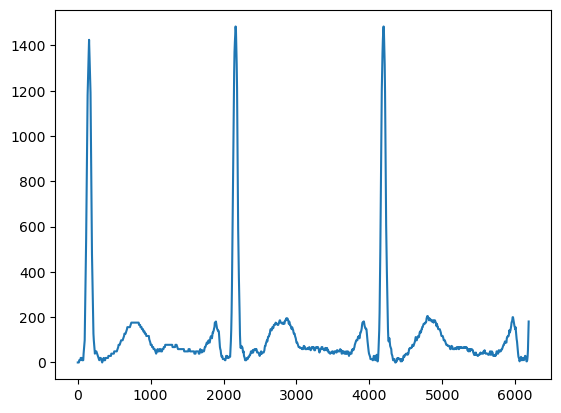

KeyboardInterrupt: 

In [6]:
#Plot origin shifted traces
fig, ax = plt.subplots()

new_lead_list = np.array(new_lead_list)
ax.plot(new_lead_list[:,0], new_lead_list[:,1], markeredgewidth=2)
plt.show()


#Plot x,y traces of each lead in discovery run
fig, ax = plt.subplots()

lead_idx = 3
ax.plot(lead_numeric[lead_idx][:,0], lead_numeric[lead_idx][:,1], markeredgewidth=2)
plt.show()

#ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
#       ylim=(0, 8), yticks=np.arange(1, 8))